## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import shap
import pickle
import warnings
warnings.filterwarnings('ignore')

/home/pranav/Files/Projects/ChurnPredictionPipeline-main/env/lib64/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Reading Dataset

In [3]:
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Feature + Label division

In [5]:
y = df['Churn']
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [6]:
X_cols = [col for col in df.columns if col !='Churn']
X = df[X_cols]
X.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


## Checking NA values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
from sklearn.impute import SimpleImputer
X['TotalCharges'] = pd.to_numeric(X['TotalCharges'],errors = 'coerce')
imputer = SimpleImputer(strategy='mean')
X['TotalCharges'] = imputer.fit_transform(X[['TotalCharges']])

In [9]:
len(df)

7043

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### Conclusion: There were 11 NA columns. They were filled with the Mean Total Charges value

## Checking Categorizable columns

In [11]:
y.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [12]:
for col in X.columns:
    if(col != 'customerID' and col!='tenure' and col!='MonthlyCharges' and col!= 'TotalCharges'):
        print("****************************")
        print(X[col].value_counts())
        print("****************************")

****************************
gender
Male      3555
Female    3488
Name: count, dtype: int64
****************************
****************************
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
****************************
****************************
Partner
No     3641
Yes    3402
Name: count, dtype: int64
****************************
****************************
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
****************************
****************************
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
****************************
****************************
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
****************************
****************************
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
****************************
****************************
OnlineSecurity
No                     3498


### Categorizing Columns

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
for col in X.columns:
    if(col != 'customerID' and col!='tenure' and col!='MonthlyCharges' and col!= 'TotalCharges' and col!='SeniorCitizen'):
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

        class_labels = le.classes_
        encoded_labels = range(len(class_labels))
        
        print(f"Label to Class Mapping for {col}:")
        for label, encoded_label in zip(class_labels, encoded_labels):
            print(f"  {label} -> {encoded_label}")
        
        print() 

Label to Class Mapping for gender:
  Female -> 0
  Male -> 1

Label to Class Mapping for Partner:
  No -> 0
  Yes -> 1

Label to Class Mapping for Dependents:
  No -> 0
  Yes -> 1

Label to Class Mapping for PhoneService:
  No -> 0
  Yes -> 1

Label to Class Mapping for MultipleLines:
  No -> 0
  No phone service -> 1
  Yes -> 2

Label to Class Mapping for InternetService:
  DSL -> 0
  Fiber optic -> 1
  No -> 2

Label to Class Mapping for OnlineSecurity:
  No -> 0
  No internet service -> 1
  Yes -> 2

Label to Class Mapping for OnlineBackup:
  No -> 0
  No internet service -> 1
  Yes -> 2

Label to Class Mapping for DeviceProtection:
  No -> 0
  No internet service -> 1
  Yes -> 2

Label to Class Mapping for TechSupport:
  No -> 0
  No internet service -> 1
  Yes -> 2

Label to Class Mapping for StreamingTV:
  No -> 0
  No internet service -> 1
  Yes -> 2

Label to Class Mapping for StreamingMovies:
  No -> 0
  No internet service -> 1
  Yes -> 2

Label to Class Mapping for Contract:

### Dropping Unnecessary Columns

In [15]:
X = X.drop('customerID',axis =1)

In [16]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


## Categorizing the Label Churn

In [17]:
le = LabelEncoder()
y = le.fit_transform(y)
class_labels = le.classes_
encoded_labels = range(len(class_labels))

print(f"Label to Class Mapping for Churn:")
for label, encoded_label in zip(class_labels, encoded_labels):
    print(f"  {label} -> {encoded_label}")

Label to Class Mapping for Churn:
  No -> 0
  Yes -> 1


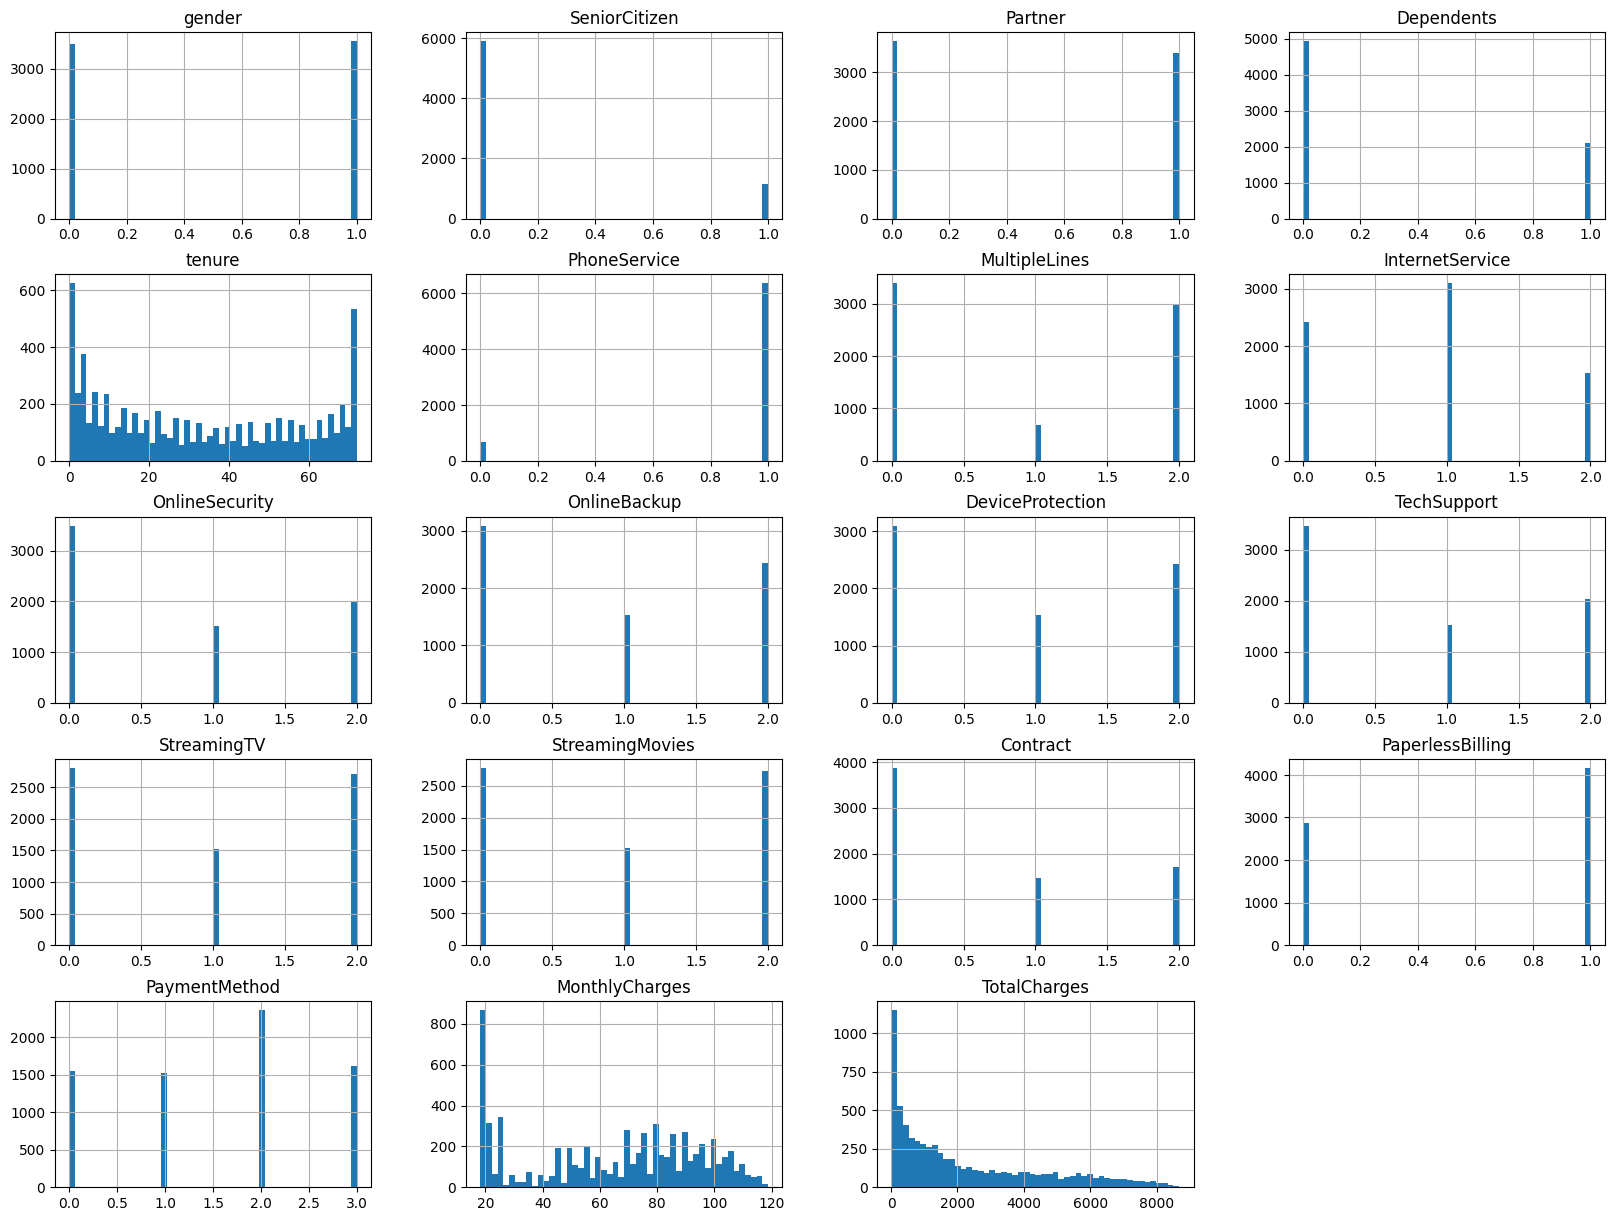

In [18]:
X.hist(bins=50, figsize=(20,15))
plt.show()

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


### Correlation Matrix

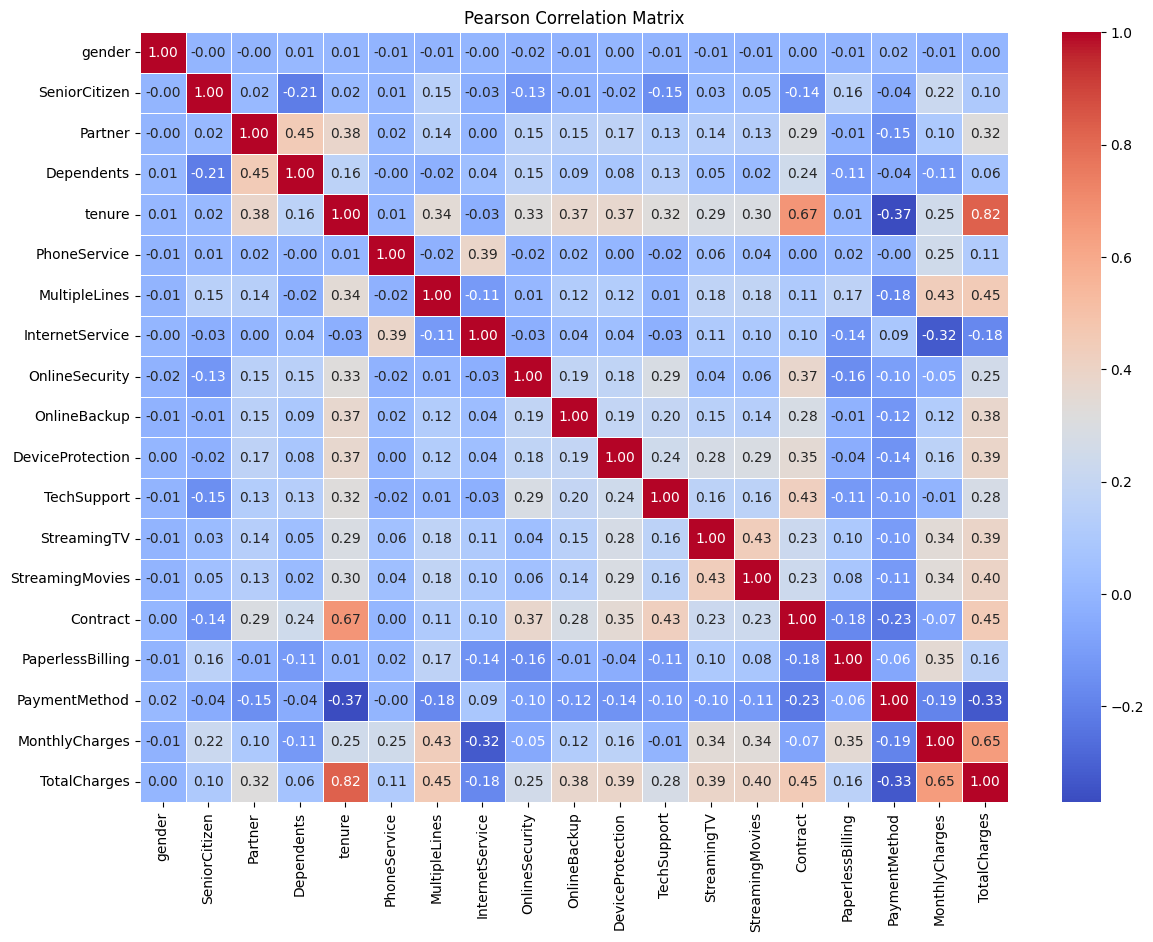

In [20]:
correlation_matrix = X.corr(method='pearson')


plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Pearson Correlation Matrix')
plt.show()

gender             -0.008612
SeniorCitizen       0.150889
Partner            -0.150448
Dependents         -0.164221
tenure             -0.352229
PhoneService        0.011942
MultipleLines       0.038037
InternetService    -0.047291
OnlineSecurity     -0.289309
OnlineBackup       -0.195525
DeviceProtection   -0.178134
TechSupport        -0.282492
StreamingTV        -0.036581
StreamingMovies    -0.038492
Contract           -0.396713
PaperlessBilling    0.191825
PaymentMethod       0.107062
MonthlyCharges      0.193356
TotalCharges       -0.199428
dtype: float64


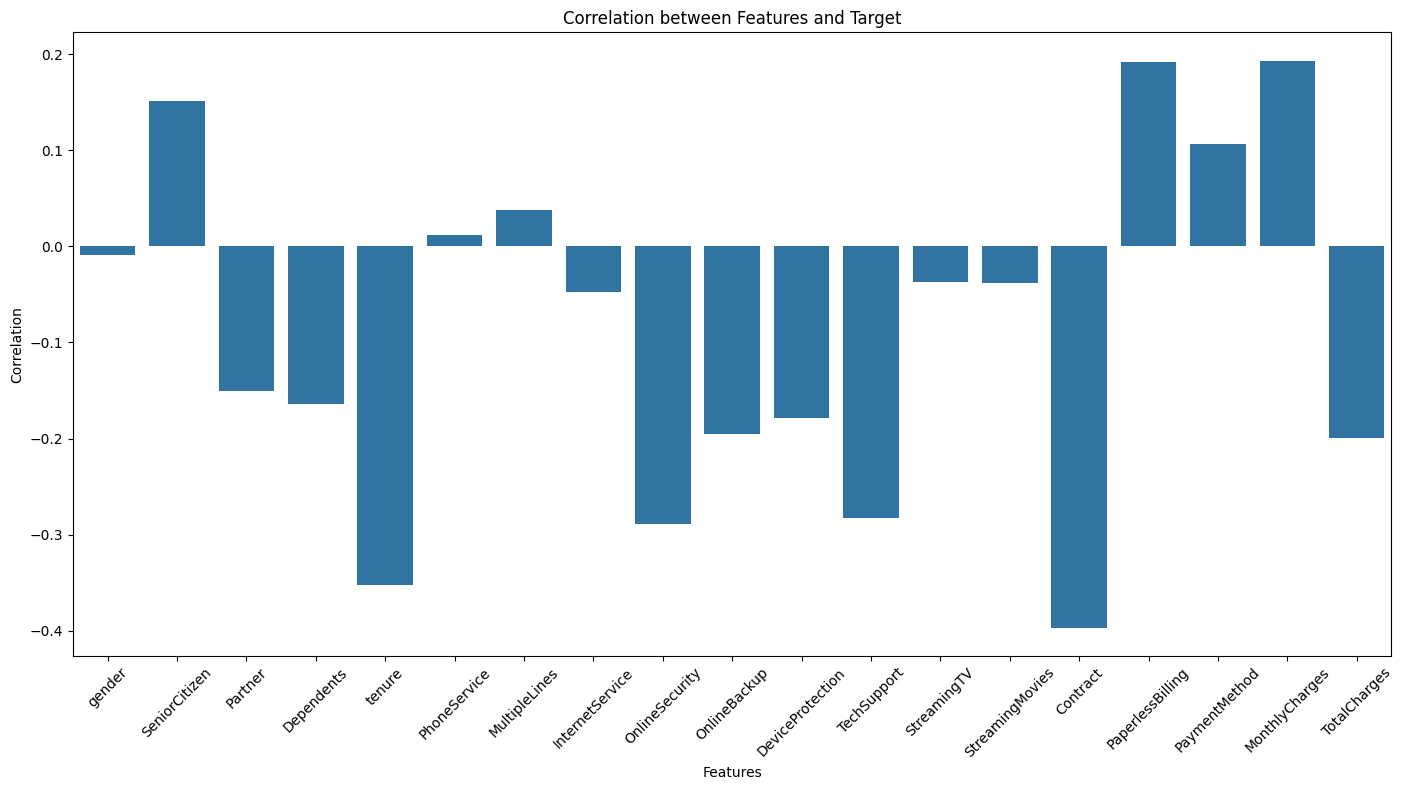

In [21]:
Y_series = pd.Series(y)

# Calculate correlation between Y and X
correlation_with_Y = X.apply(lambda x: x.corr(Y_series))

# Print correlation values
print(correlation_with_Y)

# Plot correlation values
plt.figure(figsize=(14, 8))
sns.barplot(x=correlation_with_Y.index, y=correlation_with_Y.values)
plt.title('Correlation between Features and Target')
plt.xlabel('Features')
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.tight_layout()  # Ensure labels fit within plot area
plt.ylabel('Correlation')
plt.show()

In [22]:
X = X.drop(["gender","PhoneService","MultipleLines","InternetService","StreamingTV","StreamingMovies"],axis = 1)
#X = X[["Contract","tenure","MonthlyCharges"]]

In [23]:
X.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,0,1,0,2,0,0,0,1,2,29.85,29.85
1,0,0,0,34,2,0,2,0,1,0,3,56.95,1889.50
2,0,0,0,2,2,2,0,0,0,1,3,53.85,108.15
3,0,0,0,45,2,0,2,2,1,0,0,42.30,1840.75
4,0,0,0,2,0,0,0,0,0,1,2,70.70,151.65


## Data Augmenting

In [24]:
import os
os.environ["SCIPY_ARRAY_API"] = "1"



In [25]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X, y = adasyn.fit_resample(X, y)

## Train Test Split

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.15,random_state = 42) #,stratify =y)

### Normalizing Values

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train["MonthlyCharges"] = scaler.fit_transform(X_train["MonthlyCharges"].values.reshape(-1, 1))

In [28]:
X_train

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
7293,0,0,0,55,1,0,0,0,0,0,1,0.801987,5617.640590
5288,0,0,0,1,0,0,0,0,0,1,2,0.610945,79.650000
5254,0,1,1,70,2,2,2,2,2,0,1,0.960199,7842.300000
7233,0,0,0,22,0,2,0,0,0,0,2,0.656400,1854.852831
9412,0,0,0,2,0,0,1,0,0,1,2,0.604768,150.922088
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0,1,1,72,2,2,2,2,2,1,3,0.707960,6376.550000
5191,0,1,1,23,2,2,2,2,2,1,1,0.724876,2198.300000
5390,1,0,0,12,0,0,2,0,0,1,2,0.807960,1200.150000
860,0,0,0,26,1,1,1,1,1,0,1,0.015423,457.300000


# SGD

In [29]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
clf = SGDClassifier(random_state = 42)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_train)
print(f'Train Accuracy = {accuracy_score(y_train, y_pred)}')
print(f'Train Recall = {recall_score(y_train, y_pred)}')
print(f'Train Precision = {precision_score(y_train, y_pred)}')
print(f'Train F1 = {f1_score(y_train, y_pred)}')

print()

y_pred = clf.predict(X_test)
print(f'Test Accuracy = {accuracy_score(y_test, y_pred)}')
print(f'Test Recall = {recall_score(y_test, y_pred)}')
print(f'Test Precision = {precision_score(y_test, y_pred)}')
print(f'Test F1 = {f1_score(y_test, y_pred)}')

Train Accuracy = 0.5953215052548311
Train Recall = 0.2972792149866191
Train Precision = 0.7560975609756098
Train F1 = 0.42676484712662077

Test Accuracy = 0.6824583866837388
Test Recall = 0.6414342629482072
Test Precision = 0.6812411847672779
Test F1 = 0.6607387140902873


# SVC

In [30]:
from sklearn.svm import SVC
m_clf = SVC(random_state = 42)
m_clf.fit(X_train,y_train)
y_pred = m_clf.predict(X_test)
print(f'Accuracy = {accuracy_score(y_test, y_pred)}')
print(f'Recall = {recall_score(y_test, y_pred, average="macro")}')
print(f'Precision = {precision_score(y_test, y_pred, average="macro")}')
print(f'F1 = {f1_score(y_test, y_pred, average="macro")}')

Accuracy = 0.5934699103713188
Recall = 0.5883273662662905
Precision = 0.5965113359162003
F1 = 0.5821585267472549


## Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 20, random_state = 42)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)
print(f'Accuracy = {accuracy_score(y_test, y_pred)}')
print(f'Recall = {recall_score(y_test, y_pred, average="macro")}')
print(f'Precision = {precision_score(y_test, y_pred, average="macro")}')
print(f'F1 = {f1_score(y_test, y_pred, average="macro")}')

Accuracy = 0.7381562099871959
Recall = 0.7436795873777244
Precision = 0.7658228754799152
F1 = 0.733836115759946


In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 42, max_depth = 55, min_samples_split = 60, min_samples_leaf = 16)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)
print(f'Accuracy = {accuracy_score(y_test, y_pred)}')
print(f'Recall = {recall_score(y_test, y_pred, average="macro")}')
print(f'Precision = {precision_score(y_test, y_pred, average="macro")}')
print(f'F1 = {f1_score(y_test, y_pred, average="macro")}')

Accuracy = 0.7778489116517285
Recall = 0.7824121724884557
Precision = 0.7984342691405654
F1 = 0.7756396485001567


## Hyperparameter tuning with Grid Search

In [33]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                  # 5-fold cross-validation
    n_jobs=-1,            # Use all available cores
    verbose=2,            # Print progress
    scoring='accuracy'    # Metric to optimize
)

grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("\nBest parameters found:")
print(grid_search.best_params_)
print(f"\nBest cross-validation score: {grid_search.best_score_:.4f}")

# Evaluate on test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print(f"\nTest set score with best parameters: {test_score:.4f}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_s

## KNeighbor Classifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=30)

In [35]:
pred_knn = knn.predict(X_test)
print(f'Accuracy = {accuracy_score(pred_knn, y_test)}')

Accuracy = 0.7016645326504481


In [36]:
X_train.shape

(8849, 13)

## Neural Network

In [37]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(13,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=1000)

2025-06-13 13:13:57.589894: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-13 13:13:57.593623: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-13 13:13:57.601813: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749800637.619187   19819 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749800637.624355   19819 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-13 13:13:57.642845: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Epoch 1/1000


W0000 00:00:1749800639.306188   19819 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4307 - loss: 7.9161
Epoch 2/1000
277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5665 - loss: 1.0729
Epoch 3/1000
277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6692 - loss: 1.0216
Epoch 4/1000
277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7026 - loss: 0.9039
Epoch 5/1000
277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6857 - loss: 1.0883
Epoch 6/1000
277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6797 - loss: 1.2133
Epoch 7/1000
277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6958 - loss: 1.0304
Epoch 8/1000
277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7149 - loss: 1.0832
Epoch 9/1000
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7224 - loss: 1.1167
Epoch 10/1000
277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7040 - loss: 1.1391
Epoch 11/1000
277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7488 - loss: 0.7167
Epoch 12/1000
277/277 ━━━━━━━━━━━━━━━━━━━━ 

In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 26)             │           364 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           405 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,357 (9.21 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,572 (6.14 KB)

## Saving Models

In [39]:
def save_sklearn_model(model, filepath):
    with open(filepath, 'wb') as f:
        pickle.dump(model, f)

In [40]:
save_sklearn_model(clf, os.path.join('models','SGD.pkl'))
save_sklearn_model(m_clf, os.path.join('models','SVC.pkl'))
save_sklearn_model(rf_clf, os.path.join('models','RandomForest.pkl'))

In [41]:
model.save(os.path.join('models','NeuralNetwork.keras'))
model.save(os.path.join('models','NeuralNetwork.h5'))